# Import Necessary Libraries

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import kagglehub
import time
from sklearn.preprocessing import StandardScaler

# Dataset Loading, Cleaning and Preprocessing

In [84]:
dataset_path = kagglehub.dataset_download('akram24/social-network-ads')
csv_file_path = f'{dataset_path}/Social_Network_Ads.csv'
df = pd.read_csv(csv_file_path)

Using Colab cache for faster access to the 'social-network-ads' dataset.


In [85]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [86]:
df = df.drop(columns=['User ID','Gender'])

In [87]:
df['Purchased'].value_counts()

,count
Purchased,
0,257
1,143


In [88]:
df.isna().sum()

,0
Age,0
EstimatedSalary,0
Purchased,0


In [89]:
X = df.drop(columns=['Purchased'])
y = df['Purchased']

In [90]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [91]:
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [92]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Model Building, Training and Evaluation

## Batch Gradient Descent

In [78]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(2,)),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ]
)

In [79]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [80]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

In [81]:
start = time.time()
history = model.fit(X_scaled,y,epochs=100,batch_size=400,validation_split=0.2)
end = time.time()
print("Training time:", end - start)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6156 - loss: 0.6686 - val_accuracy: 0.5000 - val_loss: 0.7075
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.6219 - loss: 0.6621 - val_accuracy: 0.5000 - val_loss: 0.7053
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.6281 - loss: 0.6573 - val_accuracy: 0.5000 - val_loss: 0.7034
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.6500 - loss: 0.6533 - val_accuracy: 0.5000 - val_loss: 0.7017
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.6594 - loss: 0.6497 - val_accuracy: 0.5000 - val_loss: 0.7001
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.6625 - loss: 0.6465 - val_accuracy: 0.5000 - val_loss: 0.6987
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.6719 - loss: 0.6435 - val_accuracy: 0.5125 - val_loss: 0.6973
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.6844 - loss: 0.6406 - val_accuracy: 0.5250 - val_loss:

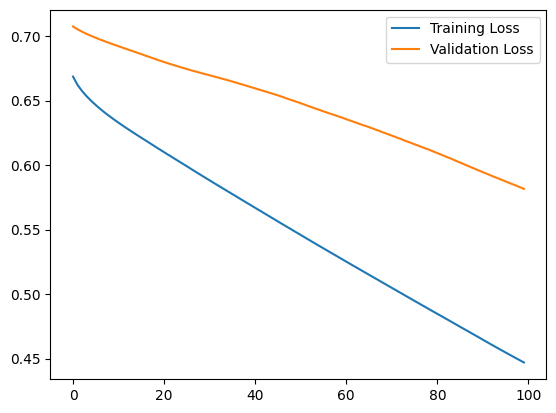

In [82]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

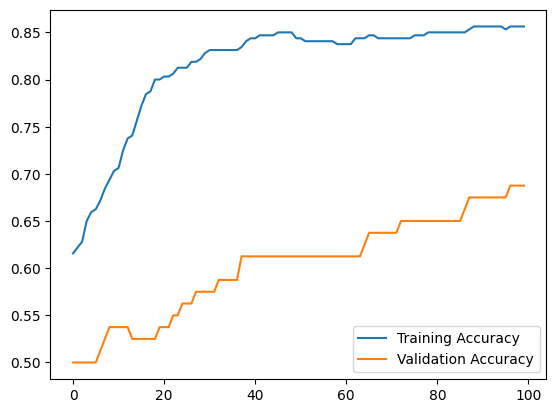

In [83]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()

## Stochastic Gradient Descent

In [93]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(2,)),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ]
)

In [94]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [95]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

In [96]:
start = time.time()
history = model.fit(X_scaled,y,epochs=100,batch_size=1,validation_split=0.2)
end = time.time()
print("Training time:", end - start)

Epoch 1/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5262 - loss: 0.6999 - val_accuracy: 0.4375 - val_loss: 0.6883
Epoch 2/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7733 - loss: 0.6452 - val_accuracy: 0.5250 - val_loss: 0.6658
Epoch 3/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8320 - loss: 0.5996 - val_accuracy: 0.5875 - val_loss: 0.6200
Epoch 4/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7916 - loss: 0.5763 - val_accuracy: 0.7000 - val_loss: 0.5741
Epoch 5/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8554 - loss: 0.5084 - val_accuracy: 0.7625 - val_loss: 0.5331
Epoch 6/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8511 - loss: 0.4928 - val_accuracy: 0.7875 - val_loss: 0.4788
Epoch 7/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8384 - loss: 0.4689 - val_accuracy: 0.8000 - val_loss: 0.4520
Epoch 8/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8752 - loss: 0.4276 - val_accu

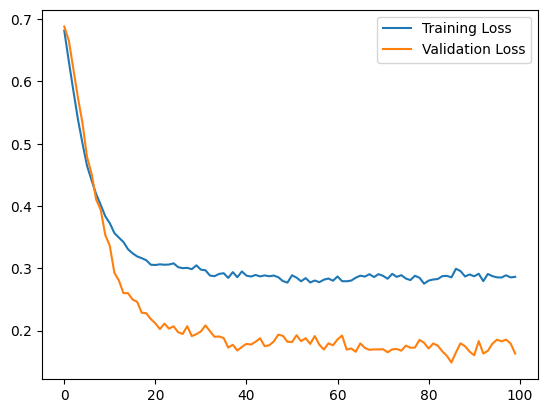

In [97]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

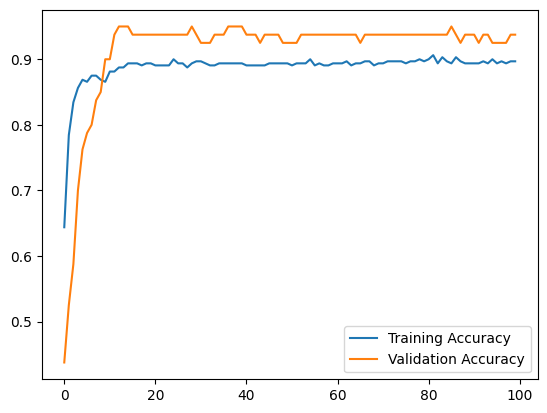

In [98]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()